<p align="left">
  <img src="./logo_UTN.svg" />
</p>


# **Teoría de Circuitos II - R4001 - 2023**
## Trabajo Semanal 1
### Autor: Bruno Glecer

## Consigna

La tarea semanal consiste en realizar un analisis del siguiente circuito

<div>
    <img src="circuito.png" width="1000"/>
</div>

Se piden las siguientes consignas:

1. Hallar la transferencia $T = \frac{V_o}{V_i}$ en función de $\omega_0$ y $Q$
2. Obtener el valor de los componentes del circuito de forma tal que $\omega_0 = 1$ y $Q = 3$
3. Ajustar el valor de $R_1$ de forma tal que $\left|T(0)\right| = 20 db$
4. (Bonus) Obtener los valores de la red normalizados en frecuencia e impedancia.
5. (Bonus) Calcular las sensibilidades $S^{\omega_0}_C$, $S^{Q}_{R_2}$ y $S^{Q}_{R_3}$
6. (Bonus) Recalcular los valores de la red para que cumpla con una transferencia Butterworth.
7. (Bonus) Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).
8. (Bonus) Simulación circuital de todos los experimentos.


## Cálculos

### Deducción de función de transferencia

Para simplificar el analisis se asumirá que los op-amps se encuentran en equilibrio y su ganancia es arbitrariamente alta. En otras palabras la tensión de entrada diferencial se asumirá que es cero.

Primero, le asignamos nombre a todas las corrientes y tensiones desconocidas en el circuito.

<div>
    <img src="circuito_anotado.png" width="800"/>
</div>

Por ley de nodos, tenemos:

$$I_1 + I_6 = I_2 + I_3$$

Seguimos haciendo los remplazos $I_1 = \frac{V_i}{R_1}$, $I_6 = \frac{V_o}{R_3}$, $I_2 = -\frac{V_a}{R_2}$ y $I_3 = - V_a C s$ para obtener:

$$\frac{V_i}{R_1} + \frac{V_o}{R_3} = -V_a\left(\frac{1}{R_2} + C s \right)$$

Remplazando $V_a = I_4 R_3$

$$\frac{V_i}{R_1} + \frac{V_o}{R_3} = -I_4 R_3\left(\frac{1}{R_2} + C s \right)$$

Remplazando $I_4 = - V_b C s$

$$\frac{V_i}{R_1} + \frac{V_o}{R_3} = V_b R_3 C s\left(\frac{1}{R_2} + C s \right)$$

Remplazando $V_b = I_5 R_4$

$$\frac{V_i}{R_1} + \frac{V_o}{R_3} = I_5 R_4 R_3 C s\left(\frac{1}{R_2} + C s \right)$$

Remplazando $I_5 = -\frac{V_o}{R_4}$

$$\frac{V_i}{R_1} + \frac{V_o}{R_3} = - V_o R_3 C s\left(\frac{1}{R_2} + C s \right)$$

A partir de aca se puede reordenar para encontrar $T = \frac{V_o}{V_i}$

$$T(s) = \frac{V_o}{V_i} = - \frac{1}{C^2 R_1 R_3} \frac{1}{s^2 + \frac{1}{C R_2}s + \frac{1}{\left(C R_3\right)^2}}$$

En este punto podemos notar que se trata de un filtro de segundo orden sin ceros, asi que tiene comportamiento de filtro pasa bajos.
Pasamos la funcion de transferencia a su forma estandard en terminos de $\omega_0$, $Q$ y $K$:

$$T(s) = K \frac{\omega_0^2}{s^2 + \frac{\omega_0}{Q}s + \omega_0^2} $$

Donde:

\begin{align}
 \omega_0 &= \frac{1}{C R_3}  \\
 Q &= \frac{R_2}{R_3} \\
 K &= - \frac{R_3}{R_1}
\end{align}

## Verificacion

Aprovecho para realizar una verificacion utilizando SymPy modificando el codigo del Trabajo Semanal anterior.

In [11]:
from sympy import solve, symbols, Eq


#Variables conocidas
R1, R2, R3, R4, C1, s = symbols("R1 R2 R3 R4 C s")

#Variables desconocidas
H, Vi, Vo, I1, I2, I3, I4, I5, I6, Va, Vb = symbols("H Vi Vo I1 I2 I3 I4 I5 I6 Va Vb")
unknowns = [H, Vi, Vo, I1, I2, I3, I4, I5, I6, Va, Vb]

equations = []

#Ecuaciones de mallas
equations.append(Eq(Vi, I6*R1))
equations.append(Eq(-Va, R2*I1))
equations.append(Eq(-Va, I2*1/(C*s)))
equations.append(Eq(Va, I3*R3))
equations.append(Eq(-Vb, I3*1/(C*s)))
equations.append(Eq(Vb, R4*I4))
equations.append(Eq(-Vo, I4*R4))
equations.append(Eq(Vo, R3*I5))

#Ecuaciones de nodos
equations.append(Eq(I6 + I5, I1 + I2))

#Relacion de H con tensiones
equations.append(Eq(H, Vo/Vi))

#Resolver
sol_H = solve(equations, unknowns, dict=True)[0][H]


sol_H

-R2*R3/(R1*(C**2*R2*R3**2*s**2 + C*R3**2*s + R2))

Aunque este expresada de una forma distinta, la funcion es la misma.

## Graficos de respuesta en frecuencia

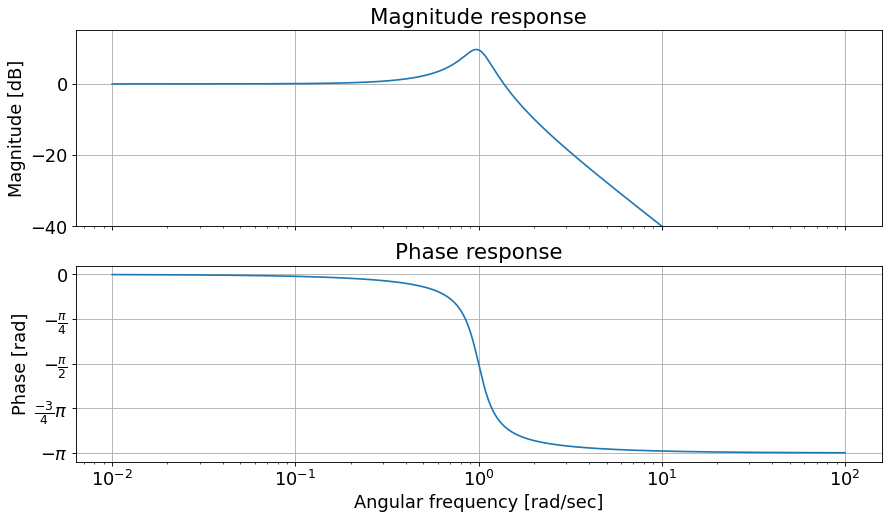

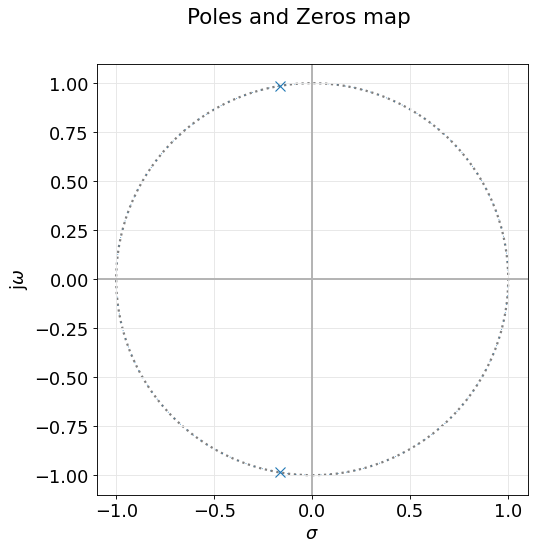

In [19]:
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal as sig

#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
plt.figure(1)
plt.close(1)

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#Configuracion del circuito
w0 = 1
Q = 3
#Funcion de transferencia
tf_num = np.array([w0**2])
tf_den = np.array([w0**2, w0/Q, 1])
tf_H = sig.TransferFunction(tf_num, tf_den)

#Bode plot de la libreria pytc2
_, axes_hdl = bodePlot(tf_H)

plt.sca(axes_hdl[0])
plt.ylim([-40,15])

#Diagrama de polos y ceros de la libreria pytc2
pzmap(tf_H)

plt.show()

## Grafico 3D de funcion de transferencia

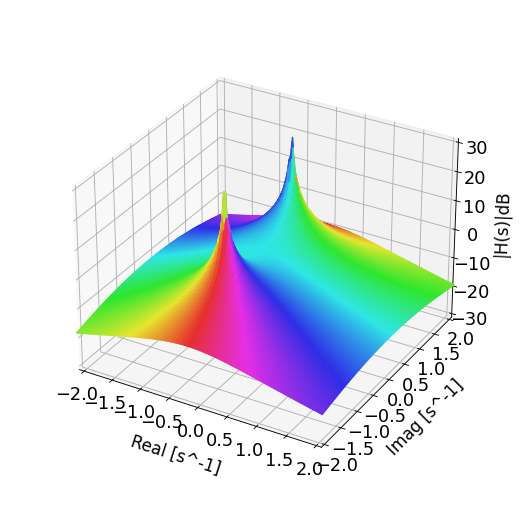

In [43]:
from matplotlib import colors
import math
#Convierto la funcion de trnasferenica en una funcion que python puede evaluar
def H(s):
    ret = 1
    for z in tf_H.zeros:
        ret *= (s - z)
    for p in tf_H.poles:
        ret /= (s - p)    
    return ret

res = 200

srpoints = np.linspace(-2.1*w0, 2.1*w0, 2*res) #Puntos de frecuencia compleja para el grafico completo
sipoints = np.linspace(-2.1*w0, 2.1*w0, 2*res)
srpoints, sipoints = np.meshgrid(srpoints, sipoints)

fig = plt.figure(figsize = (18,18)) #Figura de matplotlib
ax1 = fig.add_subplot(1, 2, 1, projection='3d')#Grafico H(s) completo

#Grafico 1 init
ax1.set_xlabel('Real [s^-1]', fontsize=15)
ax1.set_ylabel('Imag [s^-1]', fontsize=15)
ax1.set_zlabel('|H(s)|dB', fontsize=15)
ax1.set_zlim(-30, 30)
ax1.set_xlim(-2*w0, 2*w0)
ax1.set_ylim(-2*w0, 2*w0)
ax1.xaxis.labelpad=15
ax1.yaxis.labelpad=15
ax1.zaxis.labelpad=10

#Componentes de la funcion H(s) para graficar
Hsabs = lambda r, i: 20*np.log10(abs(H(r + 1j*i)))# |H(r, i)|db
Hsarg = lambda r, i: np.angle(H(r + 1j*i)) #arg(H(r, i))

#Altura del grafico
Z = np.array([Hsabs(x, y) for x,y in zip(srpoints,sipoints)])#Puntos de H(s)
Z = np.clip(Z, -30, 30)#Recorto

#Colores del grafico
hue = np.array([Hsarg(x, y) for x,y in zip(srpoints,sipoints)]) #El hue depende de la fase
sat = 0.6*np.ones(Z.shape)#La sat y el val son fijos
val = 0.8*np.ones(Z.shape)

hue = hue/(hue.max())#Normalizo y arreglo algunas cosas y paso a RGB
norm = colors.Normalize()
rgb_colors = colors.hsv_to_rgb(norm(np.moveaxis(np.array([hue, sat, val]), 0, 2)))

ax1.set_box_aspect(aspect=None, zoom=0.85)

ax1.plot_surface(srpoints, sipoints, Z, cmap="plasma", facecolors=rgb_colors, rstride=5, cstride=5)#Grafico H(s)


El grafico izquiero muestra la funcion de transferencia $H(s)$ usando la altura para representar el modulo y el color para representar la fase. De esta forma se puede apreciar la naturaleza compleja de la transfernica, y quedan bien marcados el polo y el cero. El grafico derecho muestra lo mismo pero visto de costado y cortada por el eje $j\omega$, asi se puede observar la respuesta en frecuencia plana.

## Eleccion de componentes

El objetivo propuesto de diseñar el amplificador con parametros $\omega_0 = 1$ y $Q = 3$ sin otra condicion nos lleva a inevitablemente elegir un valor para $C$, $R_2$ o $R_3$. Para este diseño propongo $C=1uF$ ya que es un valor comerical muy usado y se pueden adquirir facilmente capacitores no polarizados de ese valor.

Esto nos lleva a que:


\begin{align}
 R_3 &= \frac{1}{C \omega_0} = 100k \Omega  \\
 R_2 &= Q R_3 = 300k  \Omega
\end{align}

Si tambien deseamos cumplir con la condicion de ganancia de continua $\left|T(0)|\right| = 20dB = 10$ debemos evaluar la funcion en $s=0$:

$$|T(0)| = \left|K \frac{\omega_0^2}{0^2 + \frac{\omega_0}{Q} 0^2 + \omega_0^2}\right| = \left|K \omega_0\right| = \left|K\right| = \frac{R_3}{R_1} $$

Lo que buscamos entonces es: $\frac{R_3}{R_1} = 10$. Por lo tanto:

$$R_1 = 10k \Omega$$
